In [144]:
%load_ext autoreload
%autoreload 2

import pickle as pkl
import numpy as np

import context_distribs as cd
import display as d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
winds = [11, 12]
cat = "full"

In [146]:
two_tuple_arrs = {}
three_tuple_arrs = {}

for wind in winds:
    with open(f"objects/{cat}/{cat}_2tuple_arr_{wind}.pkl", "rb") as f:
        two_tuple_arr = pkl.load(f)

    with open(f"objects/{cat}/{cat}_3tuple_arr_{wind}.pkl", "rb") as f:
        three_tuple_arr = pkl.load(f)
    
    two_tuple_arrs[wind] = two_tuple_arr
    three_tuple_arrs[wind] = three_tuple_arr

In [147]:
two_tuple_dcts = {}
three_tuple_dcts = {}

for wind in winds:
    with open(f"objects/{cat}/{cat}_2tuple_dict_{wind}.pkl", "rb") as f:
        two_tuple_dct = pkl.load(f)

    with open(f"objects/{cat}/{cat}_3tuple_dict_{wind}.pkl", "rb") as f:
        three_tuple_dct = pkl.load(f)
    
    two_tuple_dcts[wind] = two_tuple_dct
    three_tuple_dcts[wind] = three_tuple_dct

In [148]:
with open(f"objects/{cat}/{cat}_word_dict.pkl", "rb") as f:
    word_dict = pkl.load(f)
with open(f"objects/{cat}/{cat}_wordcount_window.pkl", "rb") as f:
    wordcount_window = pkl.load(f)

In [149]:
with open(f"objects/{cat}/{cat}_speech_dict_{wind}.pkl", "rb") as f:
    speech_dict = pkl.load(f)

In [150]:
with open(f"objects/{cat}/{cat}_speeches.pkl", "rb") as f:
    speeches = pkl.load(f)

In [151]:
with open(f"objects/{cat}/{cat}_window_dict.pkl", "rb") as f:
    window_dict = pkl.load(f)

In [152]:
window_dict

{187: 0,
 188: 1,
 189: 2,
 190: 3,
 191: 4,
 192: 5,
 193: 6,
 194: 7,
 195: 8,
 196: 9,
 197: 10,
 198: 11,
 199: 12,
 200: 13}

In [153]:
start = 11
end = 12

In [154]:
(two_tuple_arrs[start].coords == two_tuple_arrs[end].coords).all()

True

In [155]:
ind_distrib = cd.indep_estimate_from_two_tuple_arr(two_tuple_arrs[start], wordcount_window[start,:])
tru_distrib = two_tuple_arrs[start].data / two_tuple_arrs[start].data.sum()
olsres, prd_distrib = cd.do_regression(ind_distrib, tru_distrib)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 8.259e+05
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        20:56:53   Log-Likelihood:             4.2465e+06
No. Observations:              375137   AIC:                        -8.493e+06
Df Residuals:                  375135   BIC:                        -8.493e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.88e-08   5.64e-09     -6.877      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 8.259e+05
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        20:56:53   Log-Likelihood:             4.2465e+06
No. Observations:              375137   AIC:                        -8.493e+06
Df Residuals:                  375135   BIC:                        -8.493e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.88e-08   5.64e-09     -6.877      0.0

/home/victorvikram/speeches/display.py:116: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(0.0, 0.00015)

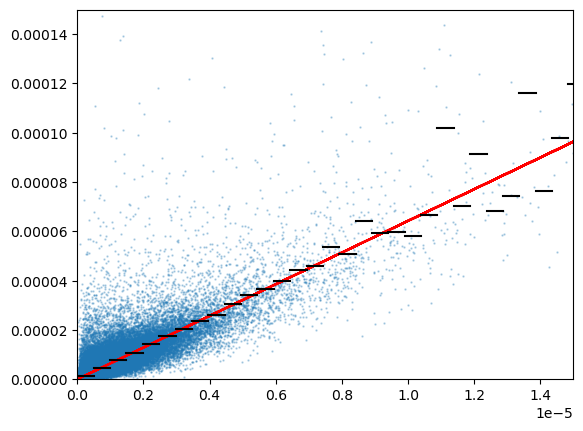

In [156]:
fig, ax = d.scatter(ind_distrib, tru_distrib, average_bins=100, include_regression=True, title="")
ax.set_xlim(left=0, right=0.000015)
ax.set_ylim(bottom=0, top=0.00015)

In [162]:
diffs = (tru_distrib - prd_distrib)

if (two_tuple_arrs[start].coords == two_tuple_arrs[end].coords).all():
    tru_distrib_next = two_tuple_arrs[end].data / two_tuple_arrs[end].sum()
    yty_change = tru_distrib_next - tru_distrib
    yty_pct_change = yty_change / tru_distrib

/tmp/ipykernel_3368439/3726021155.py:6: RuntimeWarning: divide by zero encountered in divide
  yty_pct_change = yty_change / tru_distrib


In [180]:
overshoots = tru_distrib[diffs > 0]
undershoots = tru_distrib[diffs < 0]

over_abs_change = np.abs(yty_change[diffs > 0])
under_abs_change = np.abs(yty_change[diffs < 0])

print("overshoot avg", overshoots.sum() / overshoots.shape[0])
print("overshoot chng", over_abs_change.sum() / over_change.shape[0])

print("undershoot avg", undershoots.sum() / overshoots.shape[0])
print("undershoot chng", under_abs_change.sum() / under_change.shape[0])


print(np.abs(diffs).sum() / diffs.shape[0])

overshoot avg 3.759851722630365e-06
overshoot chng 9.794097782500206e-07
undershoot avg 3.1167341899957342e-06
undershoot chng 4.83204055941703e-07
9.093142006679365e-07


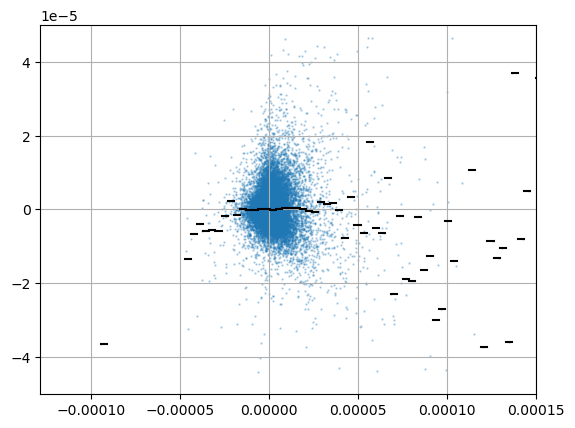

In [163]:
fig, ax = d.scatter(diffs, yty_change, average_bins=200) #, include_regression=True, title="")
ax.set_xlim(right=0.00015)
ax.set_ylim(bottom=-0.00005, top=0.00005)
ax.yaxis.grid()
ax.xaxis.grid()

In [164]:
abs_yty_change = np.abs(yty_change)
abs_yty_pct_change = np.abs(yty_pct_change)

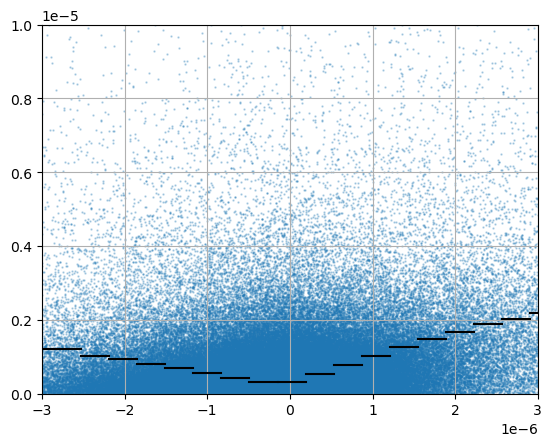

In [175]:
fig, ax = d.scatter(diffs, abs_yty_change, average_bins=2000) #, include_regression=True, title="")
ax.set_xlim(left=-0.000003, right=0.000003)
ax.set_ylim(bottom=0, top=0.00001)
ax.yaxis.grid()
ax.xaxis.grid()

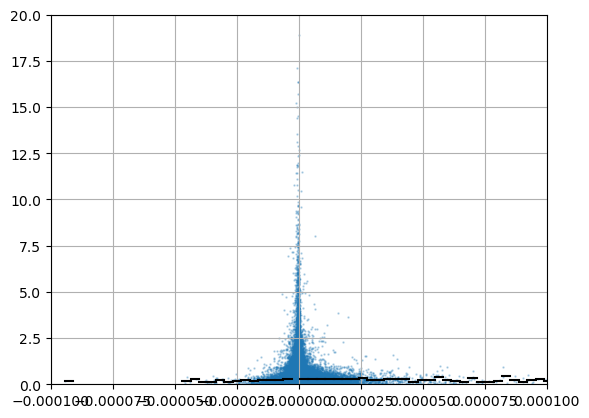

In [168]:
fig, ax = d.scatter(diffs, abs_yty_pct_change, average_bins=200) #, include_regression=True, title="")
ax.set_xlim(left=-0.0001, right=0.0001)
ax.set_ylim(bottom=0, top=20)
ax.yaxis.grid()
ax.xaxis.grid()

In [9]:
window_dict

{187: 0,
 188: 1,
 189: 2,
 190: 3,
 191: 4,
 192: 5,
 193: 6,
 194: 7,
 195: 8,
 196: 9,
 197: 10,
 198: 11,
 199: 12,
 200: 13}

In [36]:
# TODO sanity check
tot = 0

[tot := tot + count for tup, count in two_tuple_dcts[12].items()]
print(tot)

print(np.sum(two_tuple_arrs[12].data))

8366988
8366988


In [123]:
np.prod(wordcount_window[wind,[2, 3]]) / np.sum(wordcount_window[wind,:])**2

1.359615599776657e-05

In [44]:
ind_ests = []
tru_vals = []
tot = np.sum(two_tuple_arr.data)

for two_tuple in sorted(two_tuple_dcts[12].keys()):
    count = two_tuple_dcts[12][two_tuple]
    tru_val = count / tot
    ind_est = np.prod(wordcount_window[12,[two_tuple[0], two_tuple[1]]]) / np.sum(wordcount_window[12,:])**2
    
    tru_vals.append(tru_val)
    ind_ests.append(ind_est)

In [45]:
print(ind_ests[:30])
print(indep_estimate[:30])

[3.214741253261066e-05, 1.9703324162652542e-05, 2.508016848040821e-05, 2.0706246469660736e-05, 2.9095502743041047e-05, 1.505417216226733e-05, 1.550460283137051e-05, 1.402597363172098e-05, 1.6465218835151713e-05, 1.6259782294905397e-05, 1.3726722266522158e-05, 1.793506409896174e-05, 1.1429693167159556e-05, 2.117884611969218e-05, 1.9636279427877568e-05, 2.0597971015639117e-05, 1.729329899068791e-05, 9.27039857194697e-06, 1.418755024743536e-05, 1.3639360945451736e-05, 1.685135348409636e-05, 1.5081061761776012e-05, 1.2707785709139908e-05, 1.5111357377222459e-05, 3.3276775711975226e-06, 1.6539374375130094e-05, 1.0327398851300397e-05, 1.6051597040042638e-05, 1.1173943198499221e-05, 7.766552903424855e-06]
[3.21474125e-05 1.97033242e-05 2.50801685e-05 2.07062465e-05
 2.90955027e-05 1.50541722e-05 1.55046028e-05 1.40259736e-05
 1.64652188e-05 1.62597823e-05 1.37267223e-05 1.79350641e-05
 1.14296932e-05 2.11788461e-05 1.96362794e-05 2.05979710e-05
 1.72932990e-05 9.27039857e-06 1.41875502e-05 1.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 1.109e+05
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:33   Log-Likelihood:             4.5705e+06
No. Observations:              356096   AIC:                        -9.141e+06
Df Residuals:                  356094   BIC:                        -9.141e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.129e-07   1.16e-09    270.820      0.0

/home/victorvikram/speeches/display.py:116: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(0.0, 1.5e-05)

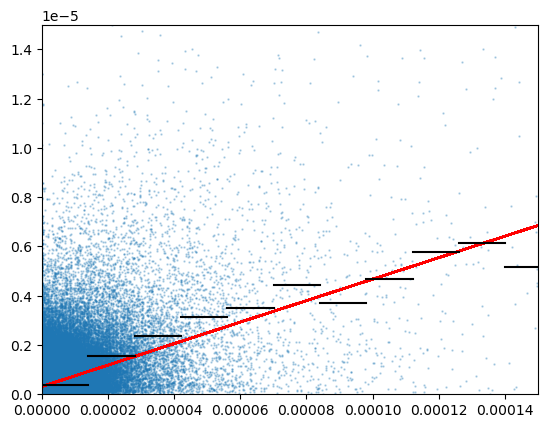

In [46]:
fig, ax = d.scatter(tru_vals, ind_ests, average_bins=100, include_regression=True, title="")
ax.set_xlim(left=0, right=0.00015)
ax.set_ylim(bottom=0, top=0.000015)

In [38]:
print(len(tru_vals))
print(len(ind_ests))

356096
356096


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 7.975e+05
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        22:40:53   Log-Likelihood:             4.7456e+06
No. Observations:              356096   AIC:                        -9.491e+06
Df Residuals:                  356094   BIC:                        -9.491e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.408e-07   7.32e-10    192.175      0.0

/home/victorvikram/speeches/display.py:116: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(0.0, 1.5e-05)

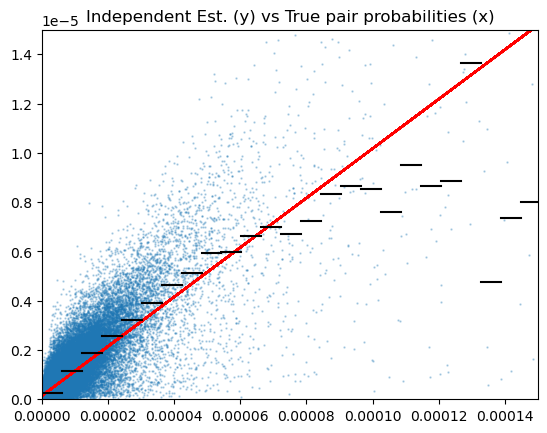

In [86]:
speeches[speeches.wind == 189].iloc[2056,:]

speech        Mr. Speaker. America is a country with a rich ...
speakerid                                                   NaN
chamber                                                       H
date                                                   18940614
speaker                                               Mr. ORTIZ
first_name                                              Unknown
last_name                                                 ORTIZ
state                                                   Unknown
gender                                                        M
word_count                                                  586
year                                                       1894
counter                                                       1
wind                                                        189
ind                                                      851468
Name: 530132407, dtype: object

In [12]:
mismatch_counter = 0
quasi_mismatch_counter = 0
for i, key in enumerate(three_tuple_dct):
    if i % 100000 == 0:
        print(key, end="\r")
    
    candidate_tuples = [(key[0], key[1]), (key[1], key[2]), (key[0], key[2])]
    candidate_tuples = [candidate_tuple for candidate_tuple in candidate_tuples if candidate_tuple[0] < 500]
    for tup in candidate_tuples:
        if tup not in two_tuple_dct:
            mismatch_counter += 1
            print(tup, key)
        elif two_tuple_dct[tup] == 0 and three_tuple_dct[key] != 0:
            mismatch_counter += 1
            print(tup, two_tuple_dct[tup])
            print(key, three_tuple_dct[key])
            
        elif two_tuple_dct[tup] < three_tuple_dct[key]: # TODO question: what are these 
            quasi_mismatch_counter += 1
            # print(tup, two_tuple_dct[tup])
            # print(key, three_tuple_dct[key])
            
print(mismatch_counter, mismatch_counter / (len(three_tuple_dct) * 3))
print(quasi_mismatch_counter, quasi_mismatch_counter / (len(three_tuple_dct) * 3))

0 0.0 484, 863)
10199 9.171976795177492e-05


In [35]:
distances, ind_distribs, tru_distribs = cd.calcDistribDiffsForEachWord(three_tuple_arr, two_tuple_arr, num_focal_words=500)

In [46]:
three_tuple_arr.coords.shape

(3, 2597227)

In [47]:
two_tuple_arr.coords.shape

(2, 356096)

In [87]:
tru_distrib_lst = []
ind_distrib_lst = []

for ind_distrib, tru_distrib in zip(ind_distribs.values(), tru_distribs.values()):
    if not np.isnan(ind_distrib).any() and not np.isnan(tru_distrib).any():
        tru_distrib_lst += list(tru_distrib)
        ind_distrib_lst += list(ind_distrib)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.799e+05
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        22:18:51   Log-Likelihood:             2.8631e+06
No. Observations:              298392   AIC:                        -5.726e+06
Df Residuals:                  298390   BIC:                        -5.726e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.119e-06   3.08e-08    101.124      0.0

/home/victorvikram/speeches/display.py:116: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(0.0, 0.001)

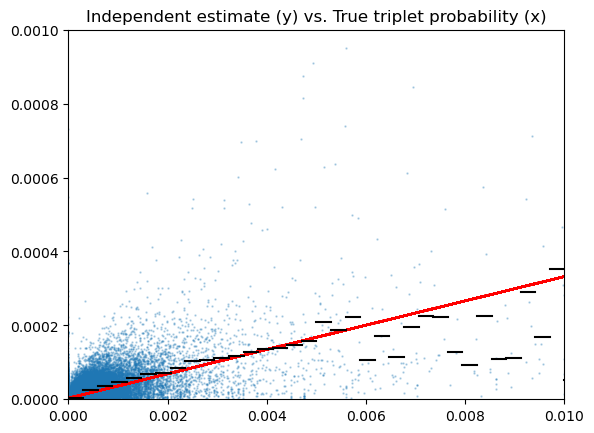

In [103]:
fig, ax = d.scatter(tru_distrib_lst[::20], ind_distrib_lst[::20], average_bins=200, include_regression=True, title="Independent estimate (y) vs. True triplet probability (x)")
ax.set_xlim(left=0, right=0.01)
ax.set_ylim(bottom=0, top=0.001)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Distance from true triplet distrib (y) by rank (x)'}>)

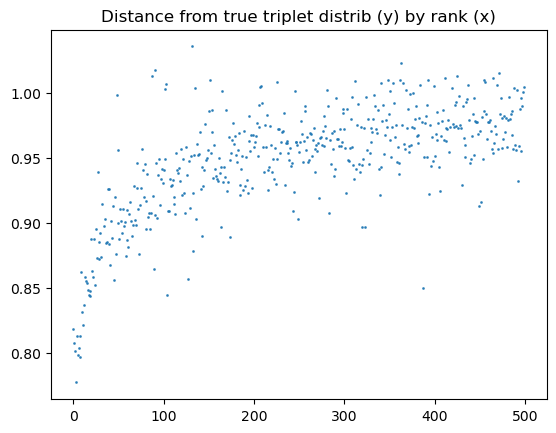

In [140]:
d.scatter(range(len(distances[0:500])), distances[0:500], title="Distance from true triplet distrib (y) by rank (x)", kwargs={"s": 1, "alpha": 0.8})

In [139]:
d.print_word_quantity_vector(word_dict, distances)

999, instance: 0.0
660, according: 0.0
661, spent: 0.0
662, testimony: 0.0
663, january: 0.0
664, john: 0.0
665, quite: 0.0
666, share: 0.0
667, nearly: 0.0
668, knows: 0.0
669, discussion: 0.0
670, former: 0.0
671, loan: 0.0
672, date: 0.0
673, prevent: 0.0
674, tariff: 0.0
675, agricultural: 0.0
676, university: 0.0
677, living: 0.0
678, getting: 0.0
679, seen: 0.0
680, beginning: 0.0
681, hour: 0.0
682, lost: 0.0
683, communities: 0.0
684, cause: 0.0
685, deficit: 0.0
686, e: 0.0
659, ways: 0.0
658, talking: 0.0
657, actually: 0.0
656, hand: 0.0
628, hold: 0.0
629, white: 0.0
630, recognize: 0.0
631, domestic: 0.0
632, claims: 0.0
633, finally: 0.0
634, close: 0.0
635, bank: 0.0
636, included: 0.0
637, permit: 0.0
638, try: 0.0
639, difficult: 0.0
640, five: 0.0
687, columbia: 0.0
641, single: 0.0
643, welfare: 0.0
644, dr: 0.0
645, name: 0.0
646, similar: 0.0
647, employment: 0.0
648, pennsylvania: 0.0
649, sent: 0.0
650, courts: 0.0
651, talk: 0.0
652, understanding: 0.0
653, trus

In [134]:
len(distances)

1000

In [99]:
for speech in speech_dict:
    if 418 in speech:
        print([word_dict])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [64]:
for i, distrib in ind_distribs.items():
    if np.isnan(distrib.sum()):
        print(i, word_dict[i])

33 program
123 programs
385 employees
418 soviet


In [72]:
wordcount_window[:,418]

array([ 125.,  488., 5557., 3141., 5185.,   57.,  229., 2936.,  587.,
         26.,    0.,   33.,    0.,    0.])

In [20]:
_, ind_distribs, tru_distribs = cd.calcDistribDiffsForEachWord(three_tuple_arrs[12], two_tuple_arrs[12], num_focal_words=500)

ind_distribs_lst = []
tru_distribs_lst = []

for ind_distrib, tru_distrib in zip(ind_distribs.values(), tru_distribs.values()):
    if not np.isnan(ind_distrib).any(): # this only happens if the word doesn't show up in the window
        ind_distribs_lst += list(ind_distrib)
        tru_distribs_lst += list(tru_distrib)

In [10]:
mismatch_counter = 0
for key in three_tuple_dct:
    candidate_tuples = [(key[0], key[1]), (key[1], key[2]), (key[0], key[2])]
    candidate_tuples = [candidate_tuple for candidate_tuple in candidate_tuples if candidate_tuple[0] < 500]
    for tup in candidate_tuples:
        if tup not in two_tuple_dct:
            mismatch_counter += 1
            print(tup, key)
print(mismatch_counter, mismatch_counter / (len(three_tuple_dct) * 3))

KeyboardInterrupt: 